In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd


'/content'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [5]:
test_data = pd.read_csv('/content/drive/MyDrive/archive/Genre Classification Dataset/test_data.txt', sep=":::", header = 0 , engine = 'python')
test_data_solution = pd.read_csv('/content/drive/MyDrive/archive/Genre Classification Dataset/test_data_solution.txt', sep=":::", header = 0 , engine = 'python')
test_data_solution.columns = ['SN', 'movie_name', 'category', 'confession']
test_data.columns = ['SN', 'movie_name' , 'confession']


In [6]:
test_data.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [7]:
test_data_solution.head()

,SN,movie_name,category,confession
0,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
test_data_solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   category    54199 non-null  object
 3   confession  54199 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
test_data.describe

<bound method NDFrame.describe of           SN                        movie_name  \
0          2         La guerra de papá (1977)    
1          3      Off the Beaten Track (2010)    
2          4           Meu Amigo Hindu (2015)    
3          5                Er nu zhai (1955)    
4          6               Riddle Room (2016)    
...      ...                               ...   
54194  54196   "Tales of Light & Dark" (2013)    
54195  54197      Der letzte Mohikaner (1965)    
54196  54198              Oliver Twink (2007)    
54197  54199                Slipstream (1973)    
54198  54200        Curitiba Zero Grau (2010)    

                                              confession  
0       Spain, March 1964: Quico is a very naughty ch...  
1       One year in the life of Albin and his family ...  
2       His father has died, he hasn't spoken with hi...  
3       Before he was known internationally as a mart...  
4       Emily Burns is being held captive in a room w...  
...                                                  ...  
54194   Covering multiple genres, Tales of Light & Da...  
54195   As Alice and Cora Munro attempt to find their...  
54196   A movie 169 years in the making. Oliver Twist...  
54197   Popular, but mysterious rock D.J Mike Mallard...  
54198   Curitiba is a city in movement, with rhythms ...  

[54199 rows x 3 columns]>

In [11]:
test_data_solution.describe

<bound method NDFrame.describe of           SN                        movie_name       category  \
0          2         La guerra de papá (1977)         comedy    
1          3      Off the Beaten Track (2010)    documentary    
2          4           Meu Amigo Hindu (2015)          drama    
3          5                Er nu zhai (1955)          drama    
4          6               Riddle Room (2016)         horror    
...      ...                               ...            ...   
54194  54196   "Tales of Light & Dark" (2013)         horror    
54195  54197      Der letzte Mohikaner (1965)        western    
54196  54198              Oliver Twink (2007)          adult    
54197  54199                Slipstream (1973)          drama    
54198  54200        Curitiba Zero Grau (2010)          drama    

                                              confession  
0       Spain, March 1964: Quico is a very naughty ch...  
1       One year in the life of Albin and his family ...  
2       His father has died, he hasn't spoken with hi...  
3       Before he was known internationally as a mart...  
4       Emily Burns is being held captive in a room w...  
...                                                  ...  
54194   Covering multiple genres, Tales of Light & Da...  
54195   As Alice and Cora Munro attempt to find their...  
54196   A movie 169 years in the making. Oliver Twist...  
54197   Popular, but mysterious rock D.J Mike Mallard...  
54198   Curitiba is a city in movement, with rhythms ...  

[54199 rows x 4 columns]>

In [12]:
test_data.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [13]:
test_data.count()

SN            54199
movie_name    54199
confession    54199
dtype: int64

In [14]:
test_data_solution.count

<bound method DataFrame.count of           SN                        movie_name       category  \
0          2         La guerra de papá (1977)         comedy    
1          3      Off the Beaten Track (2010)    documentary    
2          4           Meu Amigo Hindu (2015)          drama    
3          5                Er nu zhai (1955)          drama    
4          6               Riddle Room (2016)         horror    
...      ...                               ...            ...   
54194  54196   "Tales of Light & Dark" (2013)         horror    
54195  54197      Der letzte Mohikaner (1965)        western    
54196  54198              Oliver Twink (2007)          adult    
54197  54199                Slipstream (1973)          drama    
54198  54200        Curitiba Zero Grau (2010)          drama    

                                              confession  
0       Spain, March 1964: Quico is a very naughty ch...  
1       One year in the life of Albin and his family ...  
2       His father has died, he hasn't spoken with hi...  
3       Before he was known internationally as a mart...  
4       Emily Burns is being held captive in a room w...  
...                                                  ...  
54194   Covering multiple genres, Tales of Light & Da...  
54195   As Alice and Cora Munro attempt to find their...  
54196   A movie 169 years in the making. Oliver Twist...  
54197   Popular, but mysterious rock D.J Mike Mallard...  
54198   Curitiba is a city in movement, with rhythms ...  

[54199 rows x 4 columns]>

In [15]:
test_data.iloc[0:3]

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."


In [16]:
test_data_solution.loc[0]

SN                                                            2
movie_name                            La guerra de papá (1977) 
category                                                comedy 
confession     Spain, March 1964: Quico is a very naughty ch...
Name: 0, dtype: object

In [17]:

test_data.shape

(54199, 3)

In [18]:
test_data_solution.shape

(54199, 4)

In [22]:
custom_palette = sns.color_palette("tab20", 27)

Visulization of Data

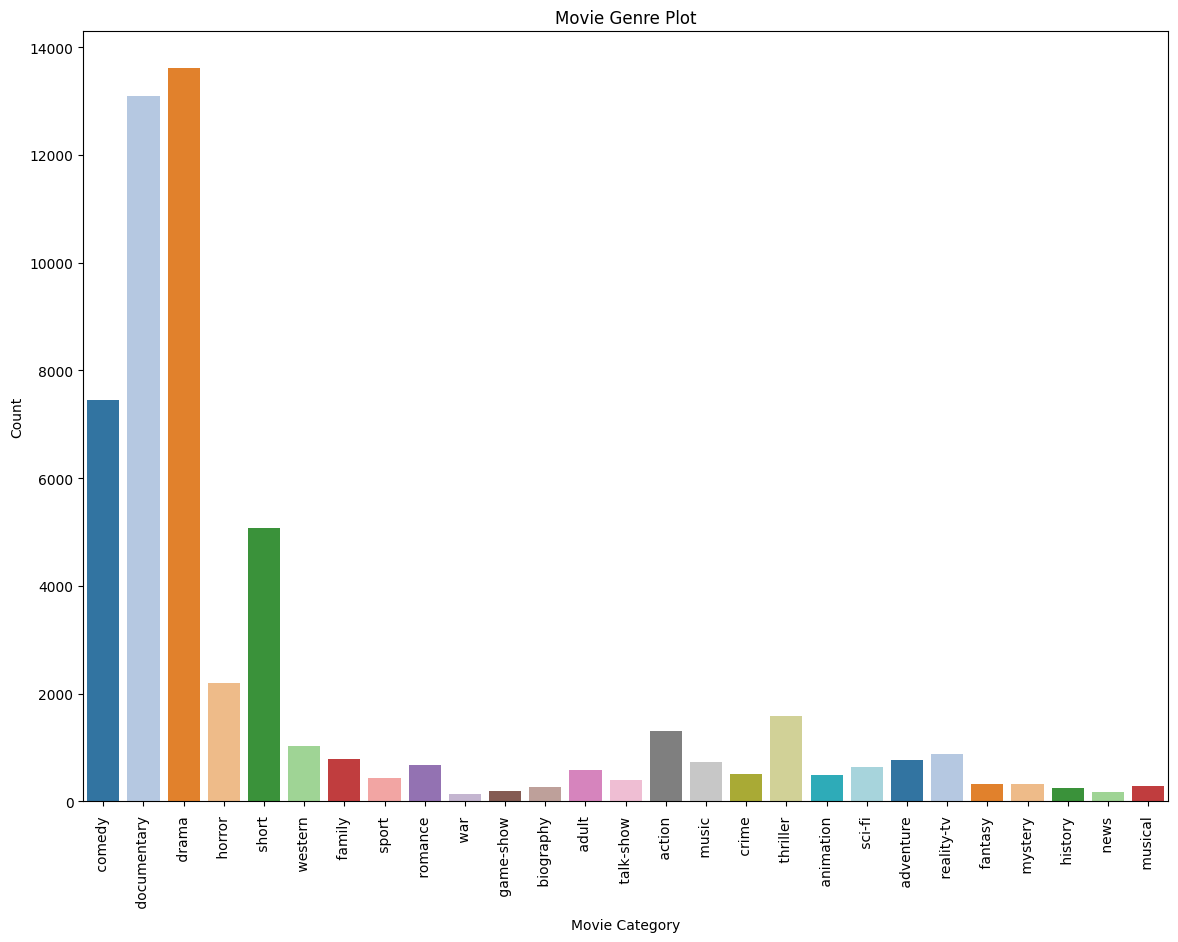

In [23]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', hue='category', data=test_data_solution, palette=custom_palette, dodge=False, legend=False)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

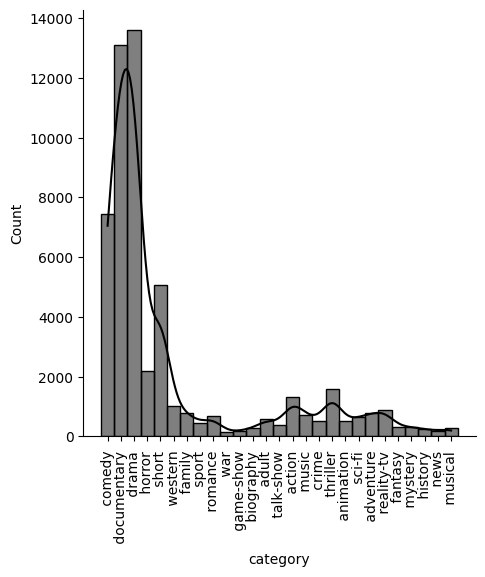

In [ ]:
sns.displot(test_data_solution.category, kde =True, color = "black")
plt.xticks(rotation=90);

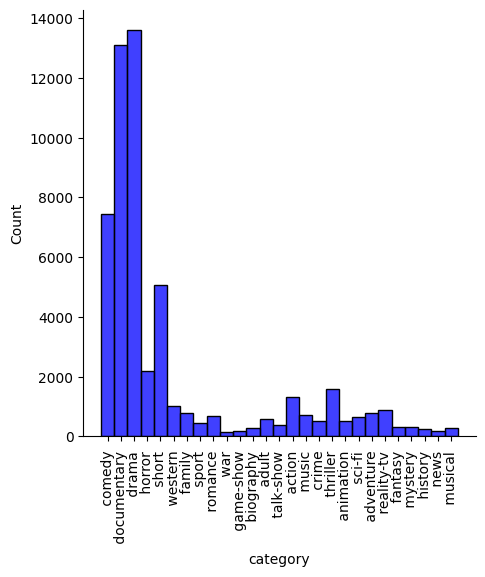

In [ ]:
sns.displot(test_data_solution.category, kde=False, color = "blue")
plt.xticks(rotation=90);

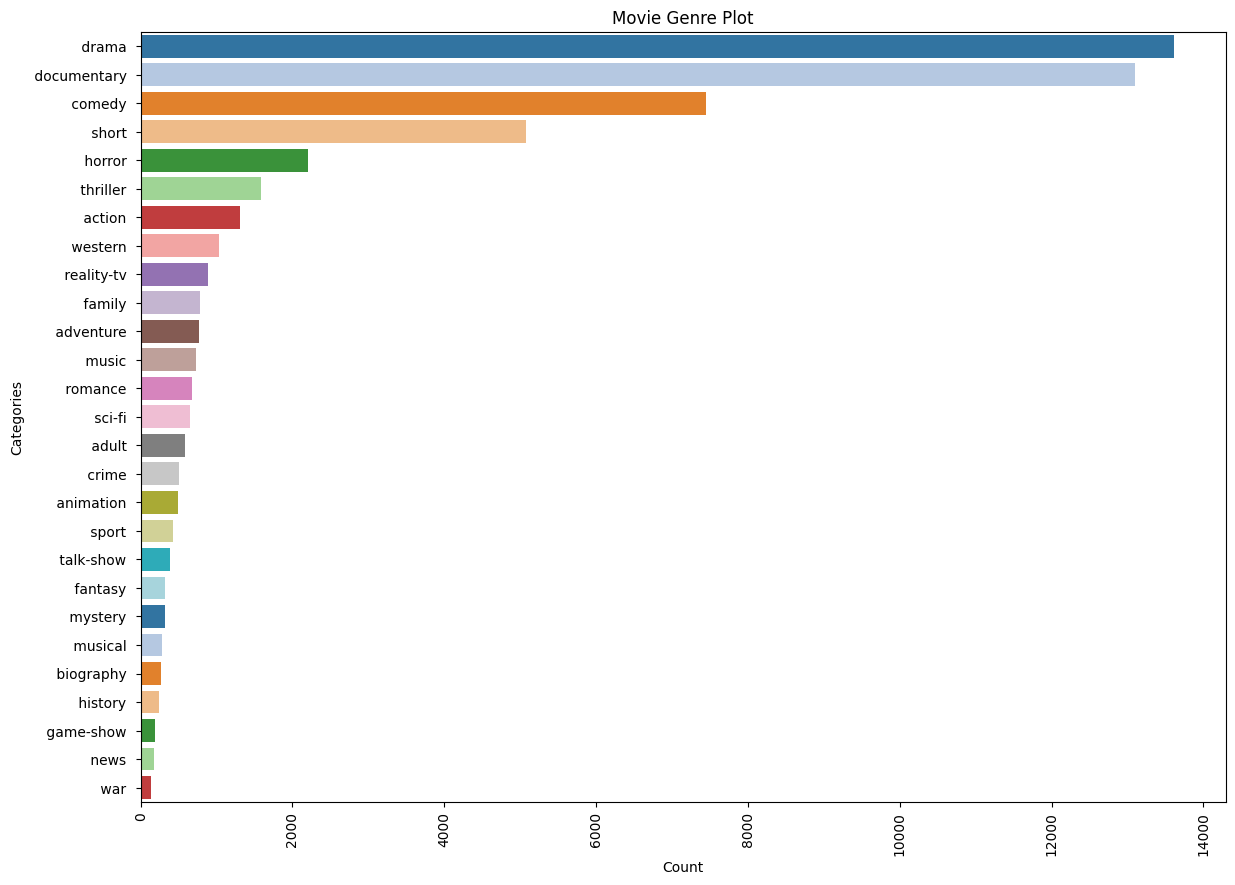

In [26]:
plt.figure(figsize=(14, 10))

count1 = test_data_solution.category.value_counts().reset_index()
count1.columns = ['category', 'count']

sns.barplot(x='count', y='category', hue='category', data=count1, palette=custom_palette, dodge=False, legend=False)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

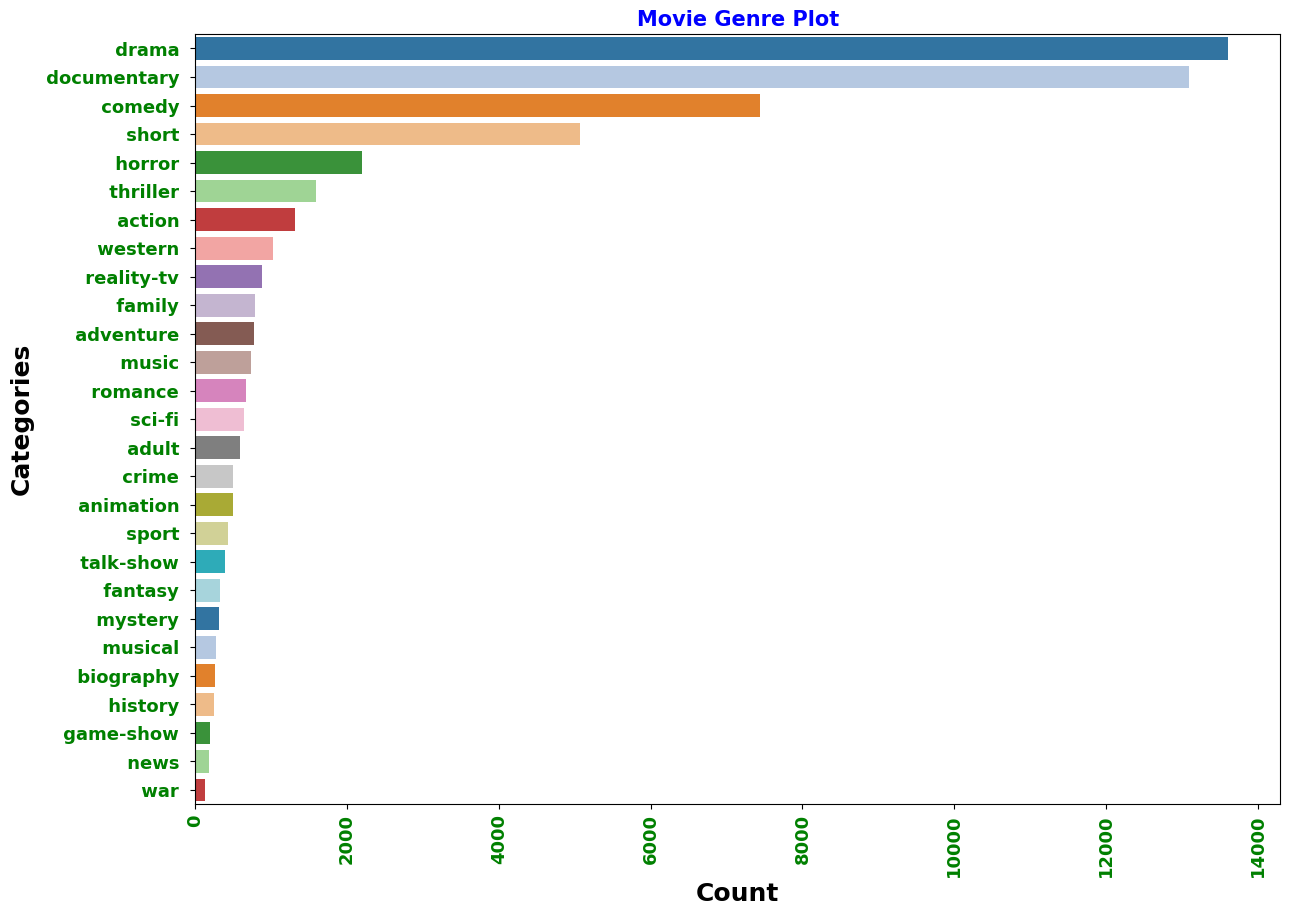

In [53]:
plt.figure(figsize=(14, 10))

count1 = test_data_solution.category.value_counts().reset_index()
count1.columns = ['category', 'count']

sns.barplot(x='count', y='category', hue='category', data=count1, palette=custom_palette, dodge=False, legend=False)
plt.xlabel('Count', fontsize=18, fontweight='bold')
plt.ylabel('Categories', fontsize=18, fontweight='bold')
plt.title('Movie Genre Plot', fontsize=15, fontweight='bold', color='blue')
plt.xticks(rotation=90, fontsize=13, fontweight='bold', color='green')
plt.yticks(fontsize=13, fontweight='bold', color='green')
plt.show()

In [30]:
data_combined = pd.concat([test_data_solution, test_data], axis = 0)


In [31]:
data_combined.head()

,SN,movie_name,category,confession
0,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
4,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...


In [32]:
data_combined.shape

(108398, 4)

In [33]:
data_combined.shape


(108398, 4)

In [34]:
data_combined.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [35]:
data_combined.count()

SN            108398
movie_name    108398
category       54199
confession    108398
dtype: int64

In [36]:
encoder = LabelEncoder()
data_combined['category'] = encoder.fit_transform(data_combined['category'].values)

In [37]:
data_combined.head()

,SN,movie_name,category,confession
0,2,La guerra de papá (1977),5,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),7,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),8,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),8,Before he was known internationally as a mart...
4,6,Riddle Room (2016),13,Emily Burns is being held captive in a room w...


In [39]:
data_combined.category = data_combined.category.fillna(data_combined.category.mean())

In [40]:
data_combined.count()

SN            108398
movie_name    108398
category      108398
confession    108398
dtype: int64

In [41]:
data_combined.duplicated().values.any()

False

# Preprocessing the data

In [42]:
vectoriezer = TfidfVectorizer()

In [43]:
X = vectoriezer.fit_transform(data_combined["confession"])

In [44]:
data_combined.head()

,SN,movie_name,category,confession
0,2,La guerra de papá (1977),5,"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),7,One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),8,"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),8,Before he was known internationally as a mart...
4,6,Riddle Room (2016),13,Emily Burns is being held captive in a room w...


In [45]:
Y = data_combined['category']

In [46]:
X_test_data_solution, X_test_data, y_test_data_solution, y_test_data =train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier

In [47]:
naive_bayes_model = MultinomialNB()

In [48]:
naive_bayes_model.fit(X_test_data_solution, y_test_data_solution)

MultinomialNB()

In [49]:
nb_predictions = naive_bayes_model.predict(X_test_data)

In [50]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test_data, nb_predictions))
print(classification_report(y_test_data, nb_predictions))
print("Accuracy: ", accuracy_score(y_test_data, nb_predictions))
print("r2_Score: ", r2_score(y_test_data, nb_predictions))

Naive Bayes Model:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   292]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   110]
 [    0     0     0     0     0     1     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   174]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    98]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    63]
 [    0     0     0     0     0    20     0     0     3     0     0     0
      0     0     0     0     0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train logistic Regression Model

In [51]:
logistic_regression_model = LogisticRegression()

In [52]:
logistic_regression_model.fit(X_test_data_solution, y_test_data_solution)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
lr_predictions = logistic_regression_model.predict(X_test_data)

In [55]:
print("Logistic Regression Model: ")
print(confusion_matrix(y_test_data, lr_predictions))
print(classification_report(y_test_data, lr_predictions))
print("Accuracy: ", accuracy_score(y_test_data, lr_predictions))
print("r2_score: ", r2_score(y_test_data, lr_predictions))

Logistic Regression Model: 
[[   5    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  286]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  110]
 [   0    0    2    0    0    0    0    1    1    0    0    0    0    0
     0    0    0    0    0    0    1    0    0    0    0    0    0  171]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    1    0    0    0    0    0    0   96]
 [   0    0    0    0    0    0    0    2    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   60]
 [   0    0    0    0    0   32    0    0    5    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0 1401]
 [   0    0    0    0    0    1    0    0    1    0    0    0    0    0
     0    0    0    0    0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
